# 1) GoogleDrive setup og import af pakker

In [ ]:
"""
Change directory to where this file is located
"""
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/MappeNavnDuLigeHarLavet/Gymnasiedag'

Mounted at /content/drive/
/content/drive/MyDrive/GymDag


In [ ]:
import gzip
import matplotlib.pyplot as plt
import random
import json
import numpy as np

# 2) Klargøring og import af data



In [ ]:
def read_labels(filename):
    """
    Function to read a file containing labels (integers 0-9) in the
    format described under 'FILE FORMATS FOR THE MNIST DATABASE'.
    The function returns a list of intergers (labels).
    """
    with gzip.open(filename, "rb") as f:
        magic = int.from_bytes(f.read(4), "big")
        assert magic == 2049, "Wrong magic_number."
        number_of_labels = int.from_bytes(f.read(4), "big")
        #print(number_of_labels)
        return [int.from_bytes(f.read(1), "big")
                for _ in range(number_of_labels)]


def read_images(filename):
    """
    Function to read a file containing MNIST images in
    the format described under'FILE FORMATS FOR THE MNIST DATABASE'.
    The function returns a three dimensional-list.
    """
    with gzip.open(filename, "rb") as f:
        magic = int.from_bytes(f.read(4), "big")
        assert magic == 2051, "Wrong magic_number."
        number_of_images = int.from_bytes(f.read(4), "big")
        number_of_rows = int.from_bytes(f.read(4), "big")
        number_of_cols = int.from_bytes(f.read(4), "big")
        images = []  # Store liste med alle 10.000 billeder
        for _ in range(number_of_images):  # Løber igennem alle 10.000 billeder
            image = []  # Tom liste som skal indeholde 28 rækker med 28 værdier
            for _ in range(number_of_cols):
                image.append([int.from_bytes(f.read(1), "big")
                              for _ in range(number_of_rows)])
            images.append(image)  # Indsætter listen indeholdende 28 rækker
        return images

def plot_images(images, labels):
    """
    Displays 10 random images from the output of read_images().
    The function outputs 2 rows each containing 5 random images
    and the corresponding label.
    """
    img_to_plot = random.sample(range(len(images)), 10)
    fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) \
        = plt.subplots(2, 5)
    for ax, i in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10],
                     img_to_plot):
        ax.imshow(images[i], cmap="Greys")
        ax.set_title(str(labels[i]))
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)


def image_to_vector(image):
    '''
    Function that converts an image (list-of-lists)
    with integer pixel values in the range [0, 255]
    to an image vector (list) of lenght 28x28=784
    with pixel values being floats in the range [0, 1].
    '''
    image_vektor = []
    for i in range(len(image)):
        temp = [x / 255 for x in image[i]]
        image_vektor += temp
    return image_vektor

def filterfunction(images, labels):
  binary_labels=[ ]
  binary_images=[ ]
  for i in range(len(labels)):
    if labels[i]==1 or labels[i]==0:
      binary_labels.append(labels[i])
      binary_images.append(images[i])
    else:
      pass
  return binary_images, binary_labels

def convert_labels(y):
    """
    Converts labels from {1,0} -> {1,-1}
    """
    return [_ if _>0 else -1 for _ in y]
    

In [ ]:
raw_train_images = read_images('train-images-idx3-ubyte.gz')
raw_test_images = read_images('t10k-images-idx3-ubyte.gz')

In [ ]:
train_labels = read_labels('train-labels-idx1-ubyte.gz')
test_labels = read_labels('t10k-labels-idx1-ubyte.gz')

In [ ]:
raw_train_images, train_labels=filterfunction(raw_train_images, train_labels)
raw_test_images, test_labels=filterfunction(raw_test_images, test_labels)



In [ ]:
train_images = np.array([np.array(image_to_vector(image)) for image in raw_train_images])
test_images = np.array([np.array(image_to_vector(image)) for image in raw_test_images])



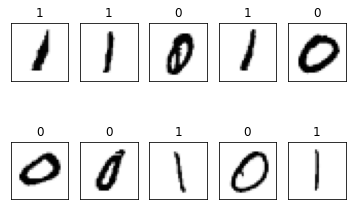

In [ ]:
plot_images(raw_train_images, train_labels)

# Aktiveringsfunktion (Skal laves ændringer her)

In [ ]:
def activation_function(a):
    """
    Receives the output of the perceptron's function as parameter a=w^tx, and applies the
    activation function on it.
    
    """

    
    if a >= 0:
        return #INDSÆT KODE HER
    return #INDSÆT KODE HER    
  

# Predcit funktion der tager en input-vektor $x$ og $a=w^tx$ og prediction $=f(a)$

In [ ]:
def predict(x, weights, bias):
    """
    Predicts the class of a given data point (x), by applying the Perceptron's 
    function, and the activation function lastly.
    As both weights and x are vectors, the dot product is used.
    
    """
    
    a = #INDSÆT KODE HER
    
    prediction = activation_function(a)
    
    return a, prediction

# Funktion der returnerer a, prediction samt $E(w,b)$ (vores kriteriefunktion)

In [ ]:
def forward_propagation(x, y, weights, bias): 
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature's value
    y: label (0 or 1) -> gets converted to {1,-1}
    weights: weights of the perceptron
    bias: bias
    """
    a, y_pred = predict(x, weights, bias)
    # Konvertering af labels
    if y == 0:
        y = -1

    
    if a*y <= 0: #Betyder at x er misklassificeret
        loss = #INDSÆT KODE HER
    else: #Betyder at x er rigtigt klassificeret
        loss = #INDSÆT KODE HER 
    
    return a, y_pred, loss

# Funktion der laver "backpropagation" og returnerer partial afledte for w ( de partial afledte for b=bias laves senere)

In [ ]:
def backpropagation(x,y):
    """
    Performs the Backpropagation step on a given data point.
    receives as input the data point, the Perceptron's weights and the partial derivative of the loss
    over the predicted y.
    The received derivative is used to calculate the partial derivative of the loss over the weight of each feature.
    A list with the partial derivatives of the loss over each weight is returned.
    """
    
    partial_derivates = list()
    if y == 0:
        y = -1
    for feature_value in x:
        partial_derivates.append(#Indsæt kode her)
        
    return partial_derivates  

# Funktion der håndterer træningen af algoritmen

In [ ]:
def optimize_perceptron(x, y, learning_rate):
    """
    Optimizes the Perceptron's weights by looping over the same steps for as many epochs as the user wants.
    Steps:
    1. Forward propagate data point
    2. Backpropagate
    3. Update weights
    4. Check stop conditions while looping
    
    It is worth noting that a history of the Perceptron's losses over each epoch is kept,
    which will be used
    """
    epoch = 0
    error = 999
    #Sætter tilfældige vægte som start
    weights = np.random.rand(x.shape[1])
    #Sætter tilfældig bias som start
    bias = np.random.rand()
    
    errors = list()
    epochs = list()
    y_ = convert_labels(y)

    # Loop until stop conditions are met
    while (epoch <= 100) and (error > 9e-4):
        
        loss_ = 0
        # Loop over every data point
        for i in range(x.shape[0]):
            
            # Forward Propagation on each data point
            
            # Indsæt kode her
            
            if a*y_[i] <= 0:

                # Backpropagation
                
                #Indsæt kode her
                
                # Opdaterer vægte of bias her
                
                #Indsæt kode her for vægtopdatering
                
                #Indsæt kode her for bias-opdatering
                

        # Evaluer algoritmen på vores test-data
        for index, feature_value_test in enumerate(x):
            a, y_pred, loss = forward_propagation(feature_value_test, y[index], weights, bias)
            loss_ += loss

        errors.append(loss_/len(x))
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print('Epoch {}. loss: {}'.format(epoch, errors[-1]))

    
    return weights, bias, errors

In [ ]:
weights, bias, errors=optimize_perceptron(train_images, train_labels, 0.001)

# Funktion til at evaluerer vores algoritme efter endt træning

In [ ]:
def calculate_accuracy(x_test, y_test, weights, bias):
    
    # Initialize True Positive, True Negative, False Positive and False Negative
    tp, tn, fp, fn = 0, 0, 0, 0
    errors=[]
    counter=0
    for sample, label in zip(x_test, y_test):
        counter+=1
        if label == 0:
            label = -1
        a, prediction = predict(sample, weights, bias)
        
        if prediction == label:
            if prediction == 1:
                tp += 1
            else:
                tn += 1
        else:
            errors.append(counter-1)
            if prediction == 1:
                fp += 1
            else:
                fn += 1

    accuracy = (tp + tn)/(tp + tn + fp + fn)
    return accuracy, tp, tn, fp, fn, errors

# Funktion til at plotte tilfældige billeder og vores forudsigelse fra test-data

In [ ]:
def plot_images_w_error(images, labels, wrongpredictions ):
    '''
    A function that plots 10 randomly chosen images along with the
    corresponding labels. It checks wheter the prediction given as input
    matches the label.
    '''

    im_to_plot = random.sample(range(len(images)), 10-len(wrongpredictions))+ wrongpredictions
    #print(im_to_plot)
    fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) \
        = plt.subplots(2, 5)
    for ax, i in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10],
                     im_to_plot):
        flatimage= np.array(image_to_vector(images[i]))
        a, pred = predict(flatimage, weights, bias)
        if pred == -1:
            pred = 0
    
        if labels[i] != pred:
   
            ax.imshow(images[i], aspect="equal", cmap="Reds")
            ax.set_title(str(pred)+", true: "
                         + str(labels[i]), color='r')
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
        else:
            
            
            ax.imshow(images[i], aspect="equal", cmap="Greys")
            ax.set_title(str(labels[i]))
            ax.axes.xaxis.set_visible(False)
            ax.axes.yaxis.set_visible(False)
    
  

# Viser resultaterne:



In [ ]:
accuracy, tp, tn, fp, fn, errors = calculate_accuracy(test_images, test_labels, weights, bias)
print("Acc: {acc}, antal tp: {tp}, antal tn: {tn}, antal fp: {fp}, antal fn: {fn}".format(acc=accuracy, tp=tp, tn=tn, fp=fp, fn=fn))

In [ ]:
plot_images_w_error(raw_test_images, test_labels, errors)

In [ ]:
import copy
w_ = copy.deepcopy(weights)
w_.resize((28, 28))
plt.imshow(w_)
plt.axis('off')
plt.colorbar()
plt.show()